In [1]:
import pandas as pd

data = pd.read_csv('traffic volume.csv')
data.head()


,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [2]:
# Check for missing values
data.isnull().sum()

# Basic info
data.info()

# Summary statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [3]:
# Fill numeric columns with mean
data['Temp'] = data['Temp'].fillna(data['Temp'].mean())
data['Rain and snow'] = data['Rain and snow'].fillna(data['Rain and snow'].mean())

# Fill categorical column 'Weather' with most frequent value
data['Weather'] = data['Weather'].fillna(data['Weather'].mode()[0])

# Verify again
data.isnull().sum()


KeyError: 'Temp'

In [4]:
print(data.columns)


Index(['holiday', 'temp', 'rain', 'snow', 'weather', 'date', 'Time',
       'traffic_volume'],
      dtype='object')


In [5]:
# Fill numeric columns with mean
data['temp'] = data['temp'].fillna(data['temp'].mean())
data['rain'] = data['rain'].fillna(data['rain'].mean())
data['snow'] = data['snow'].fillna(data['snow'].mean())

# Fill categorical column 'weather' with most frequent value
data['weather'] = data['weather'].fillna(data['weather'].mode()[0])

# Verify again
data.isnull().sum()


holiday           48143
temp                  0
rain                  0
snow                  0
weather               0
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [6]:

data['holiday'] = data['holiday'].fillna(data['holiday'].mode()[0])

# Verify again
data.isnull().sum()


holiday           0
temp              0
rain              0
snow              0
weather           0
date              0
Time              0
traffic_volume    0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot
sns.pairplot(data)
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [8]:
!pip install seaborn


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot
sns.pairplot(data)
plt.show()


ValueError: could not convert string to float: 'Labor Day'

<Figure size 1000x800 with 0 Axes>

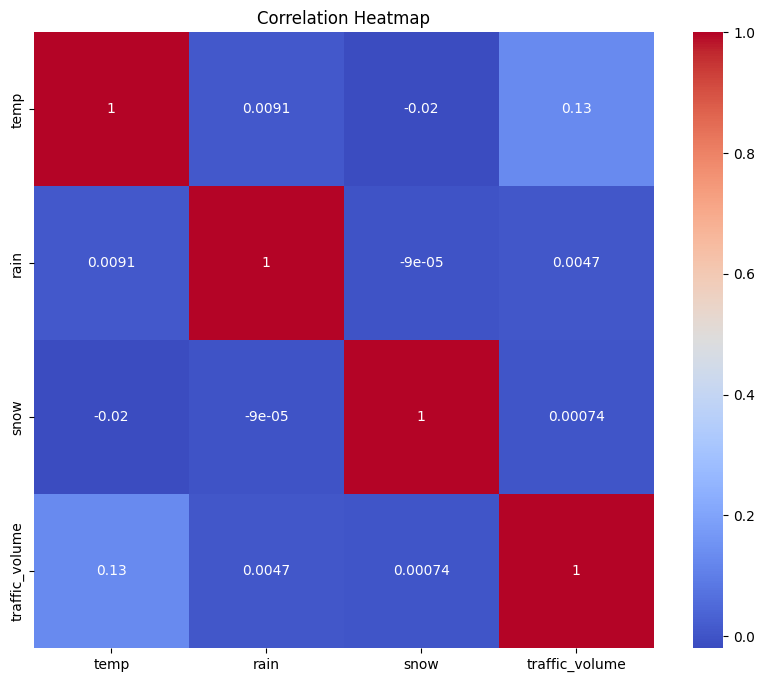

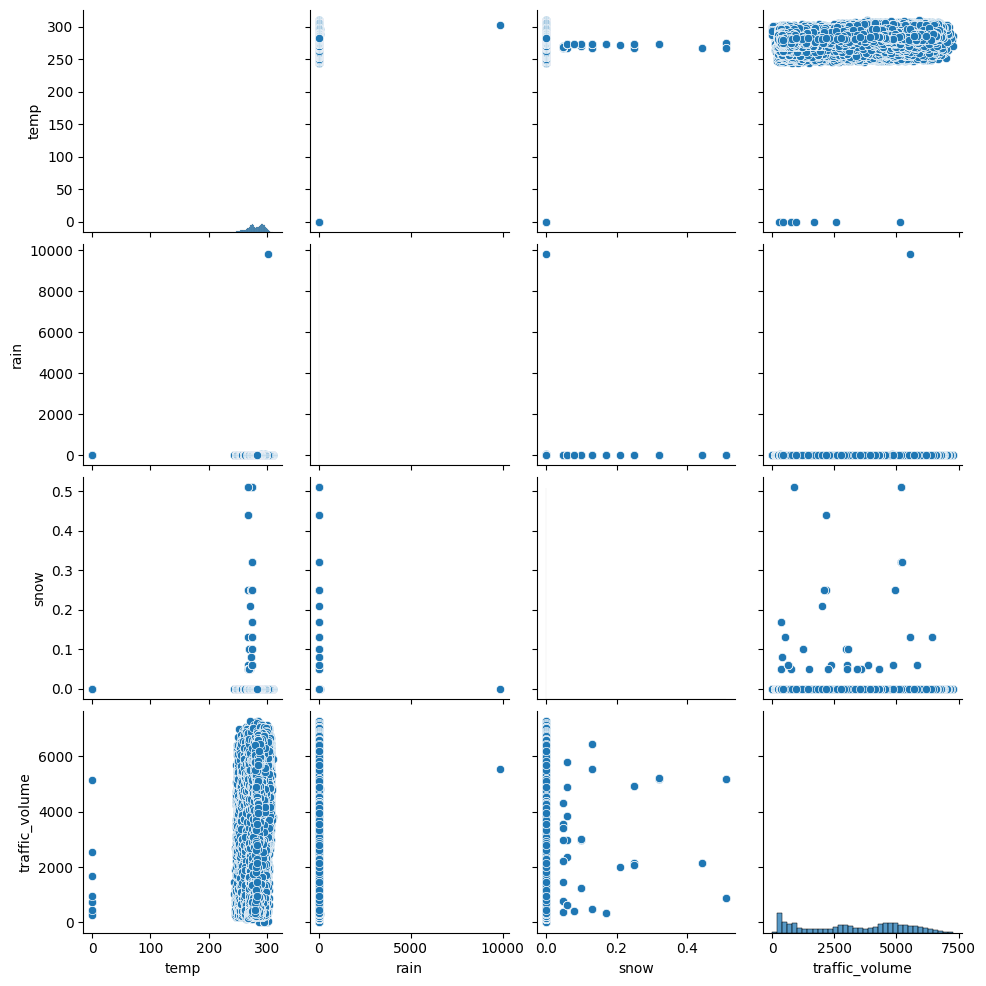

In [10]:
# Select numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot only on numeric data
sns.pairplot(numeric_data)
plt.show()


In [4]:
# Convert date to datetime and extract parts
import pandas as pd
data = pd.read_csv("traffic_volume.csv")


data['date'] = pd.to_datetime(data['date'], dayfirst=True)
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Convert time to datetime and extract hour
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')
data['hour'] = data['Time'].dt.hour

# Drop original date and time columns
data.drop(['date', 'Time'], axis=1, inplace=True)

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=['holiday', 'weather'], drop_first=True)

# Split into X and y
X = data.drop('traffic_volume', axis=1)
y = data['traffic_volume']



In [5]:
data['date'] = pd.to_datetime(data['date'], dayfirst=True)


KeyError: 'date'

In [7]:
X = data.drop('traffic_volume', axis=1)
y = data['traffic_volume']


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
import pickle
pickle.dump(model, open('traffic_model.pkl', 'wb'))


In [6]:
print(data.columns)


Index(['temp', 'rain', 'snow', 'traffic_volume', 'year', 'month', 'day',
       'hour', 'holiday_Columbus Day', 'holiday_Independence Day',
       'holiday_Labor Day', 'holiday_Martin Luther King Jr Day',
       'holiday_Memorial Day', 'holiday_New Years Day', 'holiday_State Fair',
       'holiday_Thanksgiving Day', 'holiday_Veterans Day',
       'holiday_Washingtons Birthday', 'weather_Clouds', 'weather_Drizzle',
       'weather_Fog', 'weather_Haze', 'weather_Mist', 'weather_Rain',
       'weather_Smoke', 'weather_Snow', 'weather_Squall',
       'weather_Thunderstorm'],
      dtype='object')


In [5]:
data['date'] = pd.to_datetime(data['date'], dayfirst=True)


KeyError: 'date'

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pickle

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R2 Score: {r2}')
print(f'RMSE: {rmse}')

# Save model
pickle.dump(model, open('traffic_model.pkl', 'wb'))


NameError: name 'X' is not defined

In [14]:
# Assuming previous preprocessing is done
X = data.drop('traffic_volume', axis=1)
y = data['traffic_volume']


In [15]:
import pickle

# Save your trained model to a .pkl file
pickle.dump(model, open('traffic_model.pkl', 'wb'))


NameError: name 'model' is not defined